-------------------------------------------------------------
Simple Machine Learning Algorithm
-------------------------------------------------------------
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
-------------------------------------------------------------
Training Samples
-------------------------------------------------------------
[[83252.]]
-------------------------------------------------------------
Testing Samples
-------------------------------------------------------------
[[83014.]
 [72574.]
 [56431.]
 ...
 [17000.]
 [18672.]
 [23886.]]
-------------------------------------------------------------
Model Predicted Housing Prices [452600. 452600. 452600. 452600. 452600.]
Prediction Error =  271494.53
Actual Housing Prices 1    358500
2    352100
3    341300
4    342200
5    269700
Name: median_house_value, d

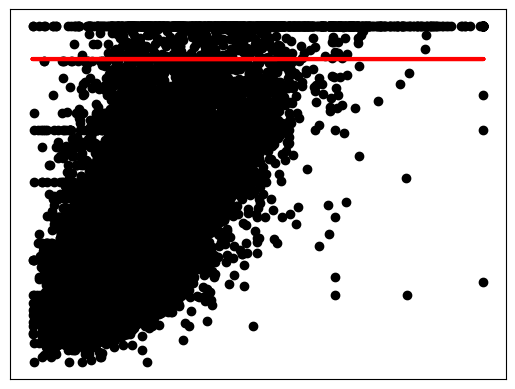

In [ ]:
import numpy as np
import pandas as pd
import math
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# from google.colab import files
import io

#-----------------------------------------------------------------------
def format_fun():
 print("-------------------------------------------------------------")
#-----------------------------------------------------------------------

def main():
 housing_data = pd.read_csv("housing.csv")

 format_fun()
 print("Simple Machine Learning Algorithm")
 format_fun()

 print(housing_data.columns)
 format_fun()

 training_data_count=16000

 (housing_data_single_feature, housing_data_labels) = (housing_data['median_income']*10000, housing_data['median_house_value'])
 housing_data_median_age = housing_data['housing_median_age']
 housing_data_median_age_training_samples = housing_data_median_age[:training_data_count]

 housing_data_training_samples = housing_data_single_feature[:training_data_count]
 housing_data_testing_samples = housing_data_single_feature[training_data_count:]

 housing_data_training_labels = housing_data_labels[:training_data_count]
 housing_data_testing_labels = housing_data_labels[training_data_count:]

 reshaped_training_samples_arr = np.array(housing_data_training_samples).reshape(-1,1)
 reshaped_testing_sample_arr = np.array(housing_data_testing_samples).reshape(-1,1)

 print("Training Samples")
 format_fun()
 print(reshaped_training_samples_arr)
 format_fun()
 print("Testing Samples")
 format_fun()
 print(reshaped_testing_sample_arr)
 format_fun()


 #list_01 = [1,2,3,4,5,6,7,8,9,10]
 #print(list_01[:5])

 lin_reg = linear_model.LinearRegression()
 lin_reg.fit(reshaped_training_samples_arr,housing_data_training_labels)
 predictions = lin_reg.predict(reshaped_testing_sample_arr)
 print("Model Predicted Housing Prices" , predictions[:5])


 error = math.sqrt(mean_squared_error(predictions, housing_data_testing_labels))
 print("Prediction Error = ", format(error, '.2f'))

 tree_reg = DecisionTreeRegressor()
 tree_reg.fit(reshaped_training_samples_arr,housing_data_training_labels)
 tree_predictions = tree_reg.predict(reshaped_testing_sample_arr)

 print("Actual Housing Prices", housing_data_testing_labels[:5])
 print("Decision Tree Predictions", tree_predictions[:5])

 tree_error = math.sqrt(mean_squared_error(tree_predictions, housing_data_testing_labels))
 print("Prediction Error = ", format(tree_error, '.2f'))

 plt.scatter(reshaped_testing_sample_arr, housing_data_testing_labels , color="black")
 plt.plot(reshaped_testing_sample_arr, predictions, color="red", linewidth=3)

 plt.xticks(())
 plt.yticks(())

 plt.show()


main()